In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats


import pandas as pd
pd.options.mode.chained_assignment = None 
%matplotlib inline

In [298]:
#loading the data
data = pd.read_csv("Clean_data")

In [299]:
data = data[["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea","SalePrice"]]


In [300]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, 
    data['SalePrice'],  
    test_size=0.3,  
    random_state=0)

In [301]:
X_train.shape

(1022, 5)

In [302]:
def diagnostic(df, var):
    
    """
    This function returns 3 plots
    1) Box Plot
    2) Q-Q Plot
    3) Histogram
    """
    plt.figure(figsize=(20,4))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(df[var])
    plt.title("Box plot-"+ var)
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[var], dist ="norm", plot=plt)
    plt.title("Q-Q-"+ var)
    
    
    plt.subplot(1, 3, 3)
    plt.hist(df[var],bins=30)
    plt.title("Histogram-" + var)

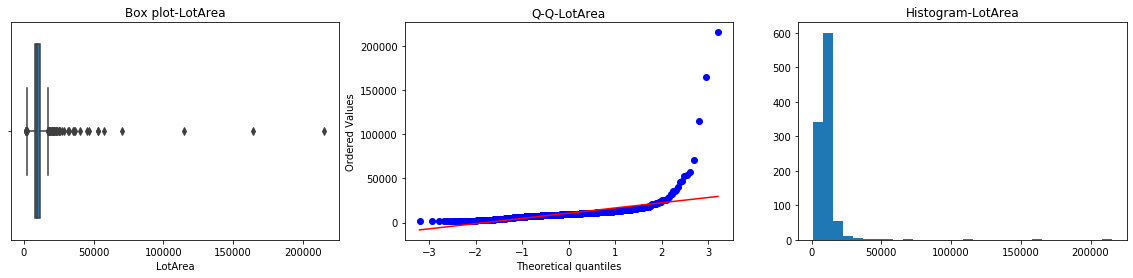

In [303]:
diagnostic(X_train,"LotArea")

In [304]:
#function that returns upper limit and lower limit
def lower_upper(data, var):
    
    IQR = data[var].quantile(0.75) - data[var].quantile(0.25)

    lower_boundary = data[var].quantile(0.25) - (IQR * 1.1)
    upper_boundary = data[var].quantile(0.75) + (IQR * 1.1)
    
    return  lower_boundary, upper_boundary

In [305]:
#applying on the variable
lower,upper = lower_upper(X_train, "LotArea")

In [306]:
#creating boolean values
outliers_LotFrontage = np.where(X_train['LotArea'] > upper, True,
                       np.where(X_train['LotArea'] < lower, True, False))

In [307]:
#trimming based on boolean values
trimmed_data = X_train.loc[~outliers_LotFrontage ]

X_train.shape , trimmed_data.shape

((1022, 5), (893, 5))

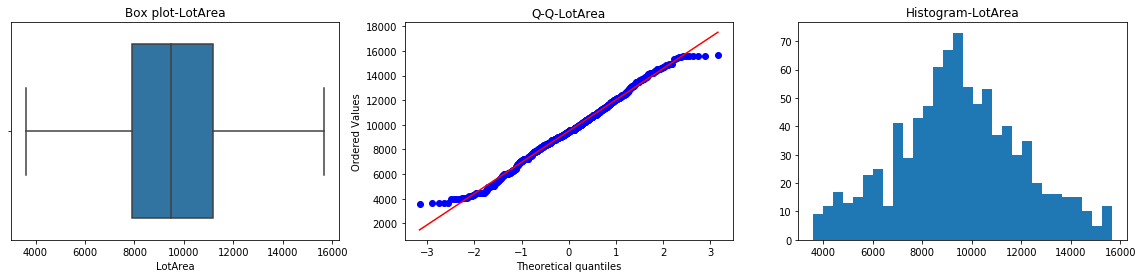

In [308]:
#checking trimmed variable
diagnostic(trimmed_data,"LotArea")